In [4]:
import numpy as np
import pandas as pd

In [5]:
raw = pd.read_csv('datos/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [6]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [7]:
data = raw[symbols]  # Seleccionamos las columnas que nos interesan
data = data.dropna()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     1972 non-null   float64
 1   GLD     1972 non-null   float64
 2   AAPL.O  1972 non-null   float64
 3   MSFT.O  1972 non-null   float64
dtypes: float64(4)
memory usage: 77.0 KB


<Axes: xlabel='Date'>

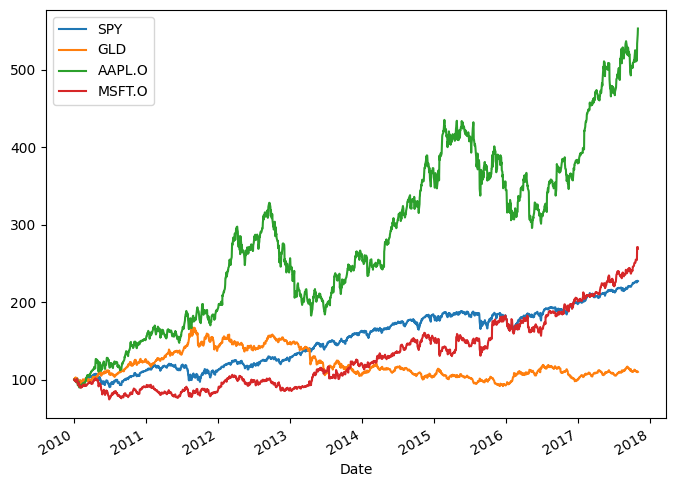

In [9]:

(data/data.iloc[0]*100).plot(figsize=(8, 6))

In [10]:

# Calculamos los rendimientos logarítmicos
log_returns = np.log(data/data.shift(1))

array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

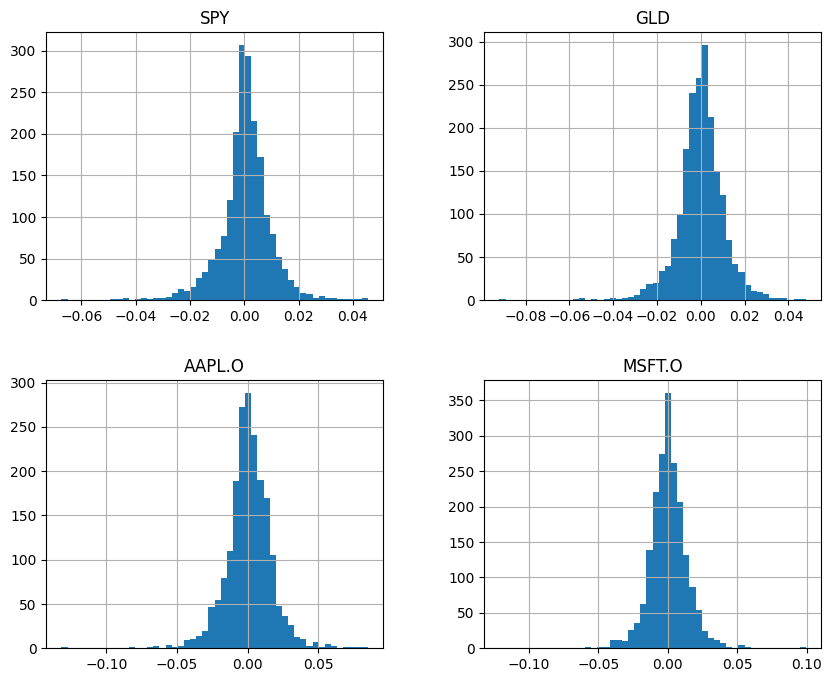

In [11]:
log_returns.hist(bins=50, figsize=(10, 8))

In [12]:
for sym in symbols:
    print('Simbolo: ', sym)
    print('Media: ', log_returns[sym].mean())
    print('Desviación estándar: ', log_returns[sym].std())
    print('Skewness: ', log_returns[sym].skew())
    print('Kurtosis: ', log_returns[sym].kurtosis())
    print('')

Simbolo:  SPY
Media:  0.0004157055583338767
Desviación estándar:  0.009340545993460425
Skewness:  -0.4692179072609512
Kurtosis:  4.5572440729555215

Simbolo:  GLD
Media:  4.78939715931399e-05
Desviación estándar:  0.010477820178604122
Skewness:  -0.6012356204479365
Kurtosis:  5.437962635749502

Simbolo:  AAPL.O
Media:  0.0008675919733442723
Desviación estándar:  0.016047916326656784
Skewness:  -0.2619904946276373
Kurtosis:  4.9379350011972765

Simbolo:  MSFT.O
Media:  0.0005015900229244841
Desviación estándar:  0.014118837697939726
Skewness:  -0.10118132743849957
Kurtosis:  7.723709146423186



Optimización del portafolio

array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

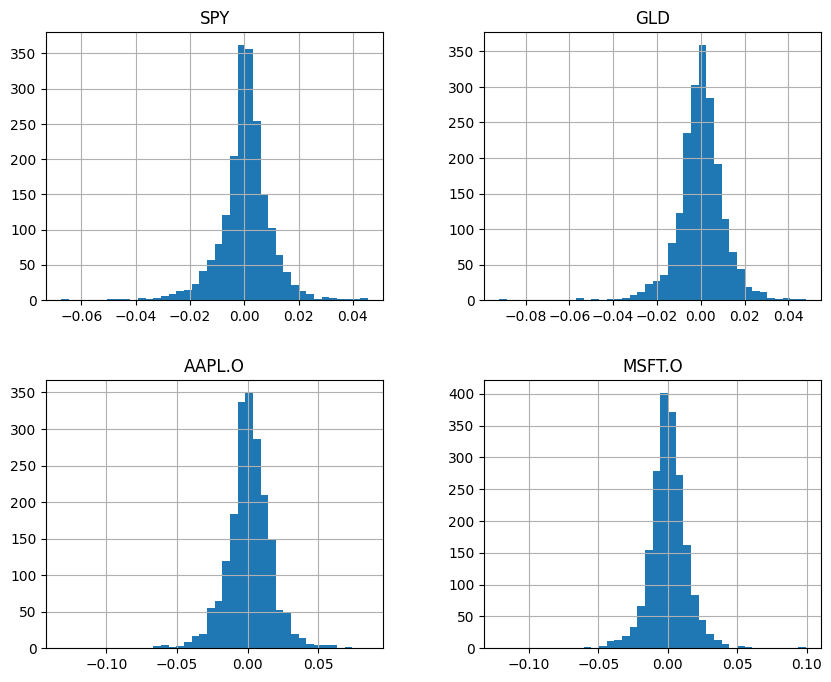

In [13]:
noa = len(symbols)
data = raw[symbols]
rets = np.log(data/data.shift(1))  # Divide cada fila con su valor anterior
rets.hist(bins=40, figsize=(10, 8))

In [14]:
rets.mean() * 252

SPY       0.104758
GLD       0.012069
AAPL.O    0.218633
MSFT.O    0.126401
dtype: float64

In [15]:
rets.cov() * 252

,SPY,GLD,AAPL.O,MSFT.O
SPY,0.021986,0.000002,0.020903,0.021608
GLD,0.000002,0.027666,0.001510,-0.000426
AAPL.O,0.020903,0.001510,0.064899,0.022504
MSFT.O,0.021608,-0.000426,0.022504,0.050234


In [16]:
weights = np.random.random(noa)
weights /= np.sum(weights)
weights.sum()

np.float64(0.9999999999999999)

In [17]:
# Expected return
returns_exp = np.sum(rets.mean() * weights) * 252
round(returns_exp*100, 2)

np.float64(10.25)

In [18]:
import scipy.optimize as sco

In [19]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252  # retorno esperado


def port_vol(weights):
    # volatilidad esperada
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [20]:
def min_func_sharpe(weights):
    return -port_ret(weights) / port_vol(weights)

In [21]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [22]:
bnds = tuple((0, 1) for x in range(noa))
eweights = np.array(noa * [1. / noa,])
eweights

array([0.25, 0.25, 0.25, 0.25])

In [23]:
min_func_sharpe(eweights)

np.float64(-0.8475033056372995)

In [27]:
opts = sco.minimize(min_func_sharpe, eweights,
                    method='SLSQP', bounds=bnds, constraints=cons)

opts

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9099024148594899
       x: [ 3.190e-01  5.857e-02  5.005e-01  1.220e-01]
     nit: 8
     jac: [-9.850e-05  2.317e-04  1.131e-04 -3.178e-04]
    nfev: 40
    njev: 8